# **Trabalho 3: Aula Assíncrona 22**

**Nome:** Luan Carlos Martins dos Santos, 23022464

**Nome:** Luciano Augusto Campagnoli da Silva, 23022469

1. Faça a importação do conjunto de dados a partir do dataset fornecido.
2. Importe as bibliotecas necessárias: pandas, numpy, torch, torchvision, etc.

In [1]:
# Importar as Bibliotecas
from os import getcwd, sep
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import warnings
import matplotlib.pyplot as plt

In [2]:
# Comando para ignorar as mensagens de avisos
warnings.filterwarnings('ignore')

3. Carregue o conjunto de dados usando a biblioteca Pandas.

In [3]:
# Carregar o dataset
df0 = pd.read_csv(getcwd()+sep+"Best Songs on Spotify from 2000-2023-1.csv", delimiter=';')
# Criar uma cópia do dataset
df = df0.copy()
df0

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,Southbound,Beach Blvd,rock,2023,140,88,60,-6,10,49,228,19,4,21
2381,Dance with Somebody - Radio Version,Mando Diao,dalarna indie,2009,150,90,55,-4,36,51,241,0,9,16
2382,Flow,Desire Machines,indie,2022,100,87,60,-7,9,74,255,0,5,15
2383,Scared of the Dark,Everything Brighter,pop,2023,120,80,65,-6,7,61,179,0,6,11


4. Realize o pré-processamento necessário no conjunto de dados, incluindo a categorização dos valores da coluna "popularity" em três classes (0, 1 e 2) usando a função pd.cut

In [4]:
# Categorizar os valores da coluna "popularity" em três classes (0, 1 e 2)
df["popularity"]=pd.cut(df["popularity"], bins = [0,50,75,100], labels = [0,1,2], include_lowest =True)
counts = df["popularity"].value_counts(dropna = False,normalize = True) * 100

df,counts

(                                       title               artist  \
 0                                    Flowers          Miley Cyrus   
 1                          Cupid - Twin Ver.          FIFTY FIFTY   
 2                                       BESO              ROSALÍA   
 3                         Boy's a liar Pt. 2       PinkPantheress   
 4     Creepin' (with The Weeknd & 21 Savage)         Metro Boomin   
 ...                                      ...                  ...   
 2380                              Southbound           Beach Blvd   
 2381     Dance with Somebody - Radio Version           Mando Diao   
 2382                                    Flow      Desire Machines   
 2383                      Scared of the Dark  Everything Brighter   
 2384                                   Sorry                LEADR   
 
              top genre  year  bpm  energy  danceability   dB  liveness  \
 0                  pop  2023  118      68             71  -4         3   
 1     k

5. Realize a codificação one-hot das colunas "artist" e "top genre" usando a função onehot_encode.

In [5]:
df0 = df0.join(
    pd.get_dummies(df0['artist'], prefix = 'a')
).drop('artist', axis=1)

df0 = df0.join(
    pd.get_dummies(df0['top genre'], prefix = 'g')
).drop('top genre', axis=1)

df0

,title,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,...,g_uk alternative pop,g_uk contemporary r&b,g_uk dance,g_uk garage,g_uk hip hop,g_uk pop,g_viral pop,g_viral rap,g_viral trap,g_vocal house
0,Flowers,2023,118,68,71,-4,3,65,200,6,...,0,0,0,0,0,0,0,0,0,0
1,Cupid - Twin Ver.,2023,120,59,78,-8,35,73,174,44,...,0,0,0,0,0,0,0,0,0,0
2,BESO,2023,95,64,77,-7,17,53,195,74,...,0,0,0,0,0,0,0,0,0,0
3,Boy's a liar Pt. 2,2023,133,81,70,-8,25,86,131,25,...,0,0,0,0,0,0,0,0,0,0
4,Creepin' (with The Weeknd & 21 Savage),2022,98,62,72,-6,8,17,222,42,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,Southbound,2023,140,88,60,-6,10,49,228,19,...,0,0,0,0,0,0,0,0,0,0
2381,Dance with Somebody - Radio Version,2009,150,90,55,-4,36,51,241,0,...,0,0,0,0,0,0,0,0,0,0
2382,Flow,2022,100,87,60,-7,9,74,255,0,...,0,0,0,0,0,0,0,0,0,0
2383,Scared of the Dark,2023,120,80,65,-6,7,61,179,0,...,0,0,0,0,0,0,0,0,0,0


6. Separe o conjunto de dados em recursos (X) e rótulos de destino (y). Descarte as colunas irrelevantes para o modelo

In [6]:
# Separar os atributos previsores
#df0=df0.drop(['title','popularity'], axis=1)
df0=df0.drop(['title','year','popularity'], axis=1)
X = np.float32(df0.copy())

# Separar a Variável alvo
Y = np.float32(df.copy().iloc[:,-1])

7. Converta os dados para tensores do PyTorch.

In [7]:
# Converter X e Y para tensores do PyTorch
Xpy = torch.from_numpy(X)
Ypy = torch.from_numpy(Y)

8. Crie uma classe CTDataset que herda torch.utils.data.Dataset e implemente os métodos init, len e getitem para representar o conjunto de dados.

In [8]:
# Criar e declarar a classe CTDataset
class CTDataset(Dataset):
  def __init__(self, songs, popularity):
    self.x = songs
    self.y = popularity

  def __len__(self):
    return self.x.shape[0]
  
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

# Chamar a classe CTDataset para obter o dataset que será separado em dados de treino, teste, e validação
dataset = CTDataset(Xpy, Ypy)

9. Divida o conjunto de dados em conjuntos de treinamento, validação e teste usando a função random_split do PyTorch, de acordo com as proporções especificadas.

In [9]:
# Definir taxas para os conjuntos de dados de treino, validação e testes
train_ratio: float = 0.7
val_ratio: float = 0.1
test_ratio: float = 0.2

# Definir o tamanho das amostras dos conjuntos de dados de treino, validação e testes
num_samples: int = len(dataset)
train_size: int = int(train_ratio * num_samples)
val_size: int = int(val_ratio * num_samples)
test_size: int= num_samples - train_size - val_size

# Definir as bases de dados de treino, de validação, e de testes
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

10. Crie carregadores de dados (DataLoader) para cada conjunto, com um tamanho de lote (batch size) adequado.

In [10]:
# Definir valor de batch size
batch_size: int = 64

# Criar os carregadores de dados (DataLoader) para cada uma das bases de dados de treino, de validação, e de testes
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

11. Defina a arquitetura da rede neural no PyTorch, incluindo as camadas Linear necessárias.

In [11]:
# Criar e declarar a classe NeuralNet para criar a arquitetura da Rede Neural
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1289, 640)
        #self.fc1 = nn.Linear(1290, 640)
        self.fc2 = nn.Linear(640, 320)
        self.fc3 = nn.Linear(320, 3)
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Chamar a classe NeuralNet para obter o modelo de Rede Neural
model = NeuralNet()

12. Defina a função de perda (loss function) como CrossEntropyLoss e o otimizador como Adam.

In [12]:
# Definir a função de perda
criterion = nn.CrossEntropyLoss()

# Definir a função de otimização
optimizer = optim.Adam(model.parameters(), lr=0.001)

13. Mova o modelo para a GPU, se disponível, para acelerar o treinamento. 

<code style="color:red">Não temos GPU</code>

14. Execute o treinamento do modelo por um número específico de épocas, calculando a perda média ao longo das iterações de treinamento.

In [13]:
# Definir o tipo de dispositivo
device = torch.device("cpu")
model.to(device)

# Definir o número de épocas
num_epochs: int = 75

Xepoch = []
Yloss = []
Yloss_val = []

# Etapas de treinamento e validação por época
for epoch in range(num_epochs):
    running_loss = 0
    running_loss_val = 0
    # Treinamento
    for features, popularity in train_loader:
        features = features.to(device)
        popularity = (popularity.to(device)).long()
        
        optimizer.zero_grad()
        
        outputs = model(features)
        loss = criterion(outputs, popularity)
        loss.backward()
        optimizer.step()
    
        running_loss = running_loss + loss.item()
        
    # Validação
    for features, popularity in val_loader:
        features = features.to(device)
        popularity = (popularity.to(device)).long()
        
        outputs = model(features)
        loss = criterion(outputs, popularity)
        loss.backward()
        optimizer.step()
        
        running_loss_val = running_loss_val + loss.item()
        
    Xepoch.append(epoch)
    Yloss.append(running_loss/len(train_loader))
    Yloss_val.append(running_loss_val/len(val_loader))
    
    # Exibir a perda média em função do número de épocas
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.2f}")
    
    # Salvar o modelo treinado e validado
    torch.save(model, 'modelNN.pt')

Epoch 1/75, Loss: 9.86
Epoch 2/75, Loss: 5.29
Epoch 3/75, Loss: 1.10
Epoch 4/75, Loss: 1.52
Epoch 5/75, Loss: 0.97
Epoch 6/75, Loss: 0.86
Epoch 7/75, Loss: 1.56
Epoch 8/75, Loss: 0.99
Epoch 9/75, Loss: 0.86
Epoch 10/75, Loss: 0.86
Epoch 11/75, Loss: 0.85
Epoch 12/75, Loss: 0.86
Epoch 13/75, Loss: 0.83
Epoch 14/75, Loss: 0.90
Epoch 15/75, Loss: 0.85
Epoch 16/75, Loss: 0.96
Epoch 17/75, Loss: 0.84
Epoch 18/75, Loss: 0.87
Epoch 19/75, Loss: 0.96
Epoch 20/75, Loss: 0.90
Epoch 21/75, Loss: 0.88
Epoch 22/75, Loss: 0.81
Epoch 23/75, Loss: 0.85
Epoch 24/75, Loss: 0.81
Epoch 25/75, Loss: 0.86
Epoch 26/75, Loss: 0.92
Epoch 27/75, Loss: 0.87
Epoch 28/75, Loss: 0.86
Epoch 29/75, Loss: 0.83
Epoch 30/75, Loss: 0.87
Epoch 31/75, Loss: 0.85
Epoch 32/75, Loss: 0.87
Epoch 33/75, Loss: 0.81
Epoch 34/75, Loss: 0.90
Epoch 35/75, Loss: 0.83
Epoch 36/75, Loss: 0.85
Epoch 37/75, Loss: 0.83
Epoch 38/75, Loss: 0.84
Epoch 39/75, Loss: 0.83
Epoch 40/75, Loss: 0.84
Epoch 41/75, Loss: 0.88
Epoch 42/75, Loss: 0.82
E

15. Avalie o desempenho do modelo nos conjuntos de validação e teste, calculando a acurácia, precisão, recall e exibindo o relatório de classificação.

In [33]:
def evaluation(data_loader: DataLoader, model: NeuralNet) -> tuple: 
    predicted_labels: list = []
    true_labels: list = []
    
    with torch.no_grad():
        for features, popularity in data_loader:
            features = features.to(device)
            popularity = popularity.to(device)

            outputs = model(features)
            
            _, predicted = torch.max(outputs.data, 1)
            
            predicted_labels.extend(predicted.cpu().numpy())
            
            true_labels.extend(popularity.cpu().numpy())

    return (predicted_labels, true_labels)

In [34]:
def print_performance_measures(y_true: list, y_pred: list) -> None:
    # Calcular a acurácia considerando o conjunto de dados de teste
    accuracy = 100 * accuracy_score(y_true, y_pred)
    print(f"Acurácia considerando o conjunto de teste: {accuracy:.2f}%")

    # Calcular a Precisão
    precision = 100*precision_score(y_true, y_pred, average='weighted')
    print(f"Precisão: {precision:.2f}%")

    # Calcular o Recall
    recall = 100*recall_score(y_true, y_pred, average='weighted')
    print(f"Recall: {recall:.2f}%")

    # Gerar o relatório de classificação
    class_report = classification_report(y_true, y_pred)
    print("\nRelatório de Classificação:")
    print(class_report)

In [35]:
# Análise do desempenho considerando o conjunto de validação
model.eval()
(predicted_labels, true_labels) = evaluation(data_loader= val_loader, model= model)

# Calcular a acurácia considerando o conjunto de dados de validação
accuracy = 100 * accuracy_score(true_labels, predicted_labels)
print(f"Acurácia considerando o conjunto de validação: {accuracy:.2f}%")

# Análise do desempenho considerando o conjunto de teste
model.eval()
(predicted_labels, true_labels) = evaluation(data_loader= test_loader, model= model)

print_performance_measures(true_labels, predicted_labels)

Acurácia considerando o conjunto de validação: 77.73%
Acurácia considerando o conjunto de teste: 59.41%
Precisão: 63.06%
Recall: 59.41%

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.06      0.08      0.07        24
         1.0       0.62      0.91      0.74       282
         2.0       0.72      0.15      0.25       172

    accuracy                           0.59       478
   macro avg       0.47      0.38      0.35       478
weighted avg       0.63      0.59      0.53       478



16. Discuta as descobertas e faça uma reflexão sobre a aplicação do PyTorch em problemas de classificação de dados do mundo real.

Em primeiro lugar, convém apresentar as curvas de treinamento e validação para justificar que o modelo está se comportando com várias flutuações tanto para os dados de treinamento quando para os dados de validação. Além disso, com base na acurácia de treinamento e testes, o modelo está sofrendo de overfitting, e está com baixa precisão e recall. Logo, o modelo precisa ser melhorado.

Entretanto, tentou-se diversas arquiteturas diferentes para a Rede Neural deste trabalho e, infelizmente, a melhor configuração encontrada foi a apresentada anteriormente.

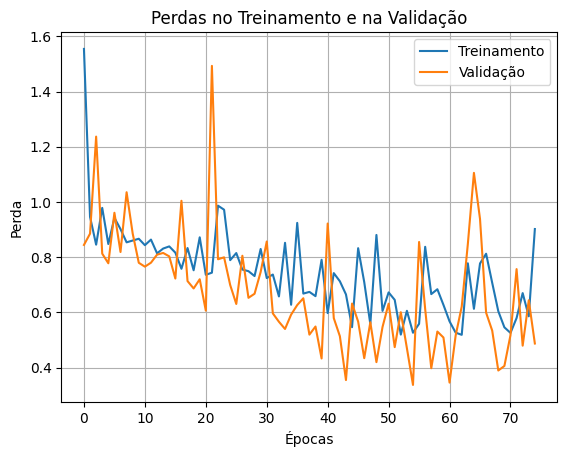

In [36]:
# Visualizar as curvas de perda no Treinamento e na Validação
plt.plot(Xepoch,Yloss)
plt.plot(Xepoch,Yloss_val)
plt.grid()
plt.title("Perdas no Treinamento e na Validação")
plt.legend(["Treinamento","Validação"])
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.show()

Por outro lado, foi encontrada uma maneira de combater o overfitting, isto é, manter a feature "year" na variável independente (X). Observe os resultados a seguir!

In [19]:
def evaluation(data_loader: DataLoader, model: NeuralNet) -> tuple: 
    predicted_labels: list = []
    true_labels: list = []
    
    with torch.no_grad():
        for features, popularity in data_loader:
            features = features.to(device)
            popularity = popularity.to(device)

            outputs = model(features)
            
            _, predicted = torch.max(outputs.data, 1)
            
            predicted_labels.extend(predicted.cpu().numpy())
            
            true_labels.extend(popularity.cpu().numpy())

    return (predicted_labels, true_labels)

In [20]:
def print_performance_measures(y_true: list, y_pred: list) -> None:
    # Calcular a acurácia considerando o conjunto de dados de teste
    accuracy = 100 * accuracy_score(y_true, y_pred)
    print(f"Acurácia considerando o conjunto de teste: {accuracy:.2f}%")

    # Calcular a Precisão
    precision = 100*precision_score(y_true, y_pred, average='weighted')
    print(f"Precisão: {precision:.2f}%")

    # Calcular o Recall
    recall = 100*recall_score(y_true, y_pred, average='weighted')
    print(f"Recall: {recall:.2f}%")

    # Gerar o relatório de classificação
    class_report = classification_report(y_true, y_pred)
    print("\nRelatório de Classificação:")
    print(class_report)

In [21]:
# Análise do desempenho considerando o conjunto de validação
model.eval()
(predicted_labels, true_labels) = evaluation(data_loader= val_loader, model= model)

# Calcular a acurácia considerando o conjunto de dados de validação
accuracy = 100 * accuracy_score(true_labels, predicted_labels)
print(f"Acurácia considerando o conjunto de validação: {accuracy:.2f}%")

# Análise do desempenho considerando o conjunto de teste
model.eval()
(predicted_labels, true_labels) = evaluation(data_loader= test_loader, model= model)

print_performance_measures(true_labels, predicted_labels)

Acurácia considerando o conjunto de validação: 56.30%
Acurácia considerando o conjunto de teste: 58.37%
Precisão: 34.07%
Recall: 58.37%

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.58      1.00      0.74       279
         2.0       0.00      0.00      0.00       173

    accuracy                           0.58       478
   macro avg       0.19      0.33      0.25       478
weighted avg       0.34      0.58      0.43       478



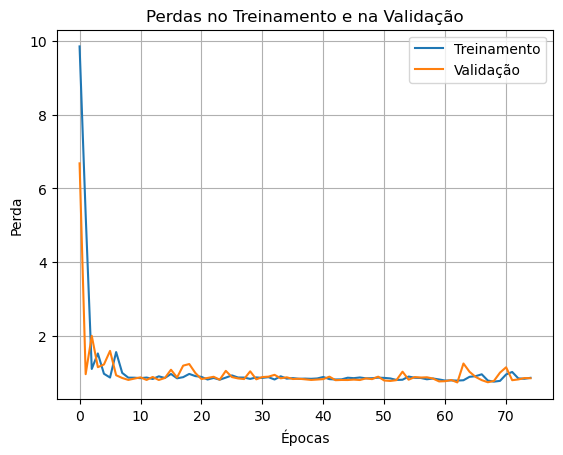

In [22]:
# Visualizar as curvas de perda no Treinamento e na Validação
plt.plot(Xepoch,Yloss)
plt.plot(Xepoch,Yloss_val)
plt.grid()
plt.title("Perdas no Treinamento e na Validação")
plt.legend(["Treinamento","Validação"])
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.show()

Diante disso, é possível perceber que o problema do overfitting foi praticamente resolvido. Porém, o modelo passou a ter baixa precisão.

O PyTorch é uma poderosa biblioteca de aprendizado de máquina e deep learning, amplamente utilizada em problemas de classificação e outras tarefas. No entanto, o desempenho do modelo não está diretamente relacionado à biblioteca em si, mas sim à arquitetura do modelo, qualidade dos dados, hiperparâmetros escolhidos, entre outros fatores. Portanto, caso as funções de perdas e otimização sejam alteradas, pode ser que o desempenho do modelo melhore.
Nesse sentido, cabe o uso de técnicas de otimização de hiperparâmetros, porém não faz parte do escopo deste trabalho.